_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [58]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 7.4MB/s 


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
import bs4
import requests

url = 'https://us.pycon.org/2019/schedule/talks/list/'
talks = requests.get(url)


In [60]:
soup = bs4.BeautifulSoup(talks.text)
r_set = soup.find_all('div', class_='presentation-description')
type(soup.find_all('div', class_='presentation-description'))

type(r_set[0].text)
rr_set = r_set[0].text.strip()
rr_set.replace('\r\n\r\n', ' ')

"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."

In [0]:
descriptions = [tag.text.strip() for tag in r_set]
descriptions = [tag.replace('\r\n\r\n', ' ') for tag in descriptions]
# descriptions


In [0]:
import pandas as pd
pd.options.display.max_colwidth = 2000

In [94]:

df = pd.DataFrame({'Description': descriptions})
df.head()

,Description
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps."
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model."
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index."
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? In this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity."
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid."


In [95]:
df['Character Count'] = df['Description'].str.len()
df.head()

,Description,Character Count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",760
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model.",296
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.",426
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? In this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity.",504
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid.",644


In [96]:
import textstat

df['Word Count'] = df['Description'].apply(textstat.lexicon_count)
df.head()

,Description,Character Count,Word Count
0,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",760,135
1,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol works, and how it can be used to alter the Python object model.",296,56
2,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable passwords, and more. This talk gives you concepts and concrete skills that will help you identify and prevent account takeovers and limit the damage. It’s inspired by practices in use at GitHub, Google, and the Python Package Index.",426,66
3,"Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applications because you think you won't be ready to interview until you do ""just one more"" day of studying? In this talk, you'll learn which concepts are the most important to study for entry-level roles and how to use your Python skills to convey your understanding of these concepts with confidence and clarity.",504,84
4,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a good foundation for an asyncio-based service, including graceful shutdowns, proper exception handling, and testing asynchronous code. We’ll get into the hairier topics as well, covering topics like working with synchronous code, debugging and profiling, and working with threaded code. We’ll learn how to approach asynchronous and concurrent programming with Python’s `asyncio` library, take away some best practices, and learn what pitfalls to avoid.",644,96


In [98]:
df.describe(include='all')

,Description,Character Count,Word Count
count,95,95.000000,95.000000
unique,95,NaN,NaN
top,"Python makes it incredibly easy to build programs that do what you want. But what happens when you want to do what you want, but with more input? One of the easiest things to do is to make a program concurrent so that you can get more performance on large data sets. But what's involved with that? Right now, there are any number of ways to do this, and that can be confusing! How does `asyncio` work? What's the difference between a thread and a process? And what's this Hadoop thing everyone keeps talking about? In this talk, we'll cover some broad ground of what the different concurrency models available to you as a Python developer are, the tradeoffs and advantages of each, and explain how you can select the right one for your purpose.",NaN,NaN
freq,1,NaN,NaN
mean,NaN,808.526316,130.821053
std,NaN,412.511969,64.357872
min,NaN,121.000000,20.000000
25%,NaN,539.500000,85.500000
50%,NaN,718.000000,116.000000
75%,NaN,1010.500000,165.000000


- Character Count: Average = 808, Min = 121, Max = 2818
- Word Count: Average = 130, Min = 20, Max = 421



In [104]:
df['Tweetable'] = df['Character Count'] <= 280
df[df['Tweetable'] == True]

,Description,Character Count,Word Count,Tweetable
54,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20,True


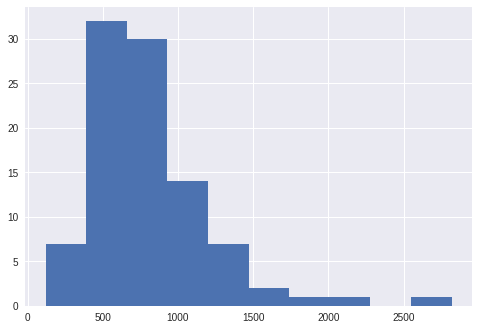

In [107]:
df['Character Count'].hist();